## Success of product / product making bad impression in market

**Objective:**\
Product reviews reveal customer sentiments helping the manufacturers decide what is required to make the product a success. Depending on the reviews provided by the users, the product is classified as good or bad and improvements can be made accordingly to cater to the requirements of the customers. I have chosen to analyse review on Amazon Products from datasets obtained via two different sources.


**Steps followed:**

    Install the required package
    Load the required libraries
    Load the dataset and assign the column names
    Data cleaning
    Creating polarity of textual data (NLP)
    Analyze the dataset
    Splitting of data
    Build Popularity based model
    Tune the parameters - cross val score
    Cluster based model
    Future tred of data - Time series
    Compare and conclude the best model

### Installed libraries

In [1]:
#!pip install wordcloud  # for installing the wordcloud

In [2]:
import pandas as pd
import numpy as np
import re                                                                # to perform regular expression
from collections import Counter                                          # To get count of unique element
from sklearn import preprocessing                                        # to do label encoder (text- numeric )
import matplotlib.pyplot as plt                                          # visualization lib
import seaborn as sns                                                    # visualization lib
from sklearn.model_selection import train_test_split                     #splitting of data in train and test
from sklearn.feature_extraction.text import TfidfVectorizer              # Extraction of textual data
from sklearn.linear_model import LogisticRegression                      # classification model for textual data
from sklearn.multiclass import OneVsRestClassifier                       # More than 2 label
from sklearn.metrics import f1_score                                     # performance of model when class in uneven distributed
from nltk.corpus import stopwords                                        # to remove all stop words
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,KFold # Lib for various types of splittung
from sklearn.metrics import roc_curve,roc_auc_score                      # data density
from sklearn.naive_bayes import MultinomialNB                            # classisfication based model                      
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix     # performance of model
from sklearn.cluster import KMeans                                       # model for clustering
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer              # sentimentanalyser lib - to know polarity of text data

#time series lib
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from wordcloud import WordCloud, STOPWORDS                                #make word clud of textual data


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shailesh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Data import

Note:  After cleaning review and meta data than file is imported

In [3]:
df=pd.read_csv('fnal_data.csv')                      # reading file 
df["reviewTime"] = pd.to_datetime(df["reviewTime"])  #converting reviewtime column into datetime data type
df.head()                                            # to get only first five data

,Unnamed: 0.1,Unnamed: 0,asin,categories,title,price,brand,reviewerID,reviewerName,reviewText,overall,summary,reviewTime,helpful_ratio,help_cat,review
0,1975,302,B000056JHX,Baby,Graco Pack 'n Play Sheet Tea,14,Graco,AQCHVXD1R9WYI,"D ""sub""",if you are purchasing or have a pack n play th...,5,a necessity,2001-07-17,1.000000,most_helpful,if you are purchasing or have a pack n play th...
1,2313,332,B000056OUH,Baby,Philips Avent Express Microwave Sterilizer,50,Philips Avent,AQCHVXD1R9WYI,"D ""sub""",this sterilizer is so easy to use even a dad l...,5,best thing since sliced bread,2001-07-23,1.000000,most_helpful,this sterilizer is so easy to use even a dad l...
2,2411,335,B000056OUF,Baby,Philips Avent Express Baby Food and Bottle Warmer,40,Philips Avent,A1E7QLJVWNFOZY,History_of_Art_Geek,the express bottle babyfood warmer is a very o...,4,the express bottle babyfood warmer does the job,2001-07-25,1.000000,most_helpful,the express bottle babyfood warmer is a very o...
3,2321,332,B000056OUH,Baby,Philips Avent Express Microwave Sterilizer,50,Philips Avent,A1E7QLJVWNFOZY,History_of_Art_Geek,i am not a clean freak who sterilizes everythi...,5,just nuke it with the express microwave steam ...,2001-07-25,1.000000,most_helpful,i am not a clean freak who sterilizes everythi...
4,1227,261,B000056HNX,Baby,Philips Avent 3 Pack 9oz Bottles,21,Philips Avent,A1E7QLJVWNFOZY,History_of_Art_Geek,in my opinion the avent bottle system is super...,5,happy avent customer,2001-08-13,0.930435,most_helpful,in my opinion the avent bottle system is super...


In [4]:
df=df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1) # drop not required column

### Shape of data

In [5]:
df.shape                                        # shape of our dataframe

(126944, 14)

### Data type

In [6]:
df.dtypes                                     # checking datatype of each column

asin                     object
categories               object
title                    object
price                     int64
brand                    object
reviewerID               object
reviewerName             object
reviewText               object
overall                   int64
summary                  object
reviewTime       datetime64[ns]
helpful_ratio           float64
help_cat                 object
review                   object
dtype: object

### Detail of data

In [7]:
df.describe()                              # Brief detail of whole dataframe

,price,overall,helpful_ratio
count,126944.000000,126944.000000,126944.000000
mean,37.461700,4.214772,0.235381
std,60.457383,1.146172,0.393213
min,0.000000,1.000000,0.000000
25%,9.000000,4.000000,0.000000
50%,17.000000,5.000000,0.000000
75%,35.000000,5.000000,0.500000
max,999.000000,5.000000,1.000000


Based on the descriptive statistics above, we see the following:

- Average review score of 4.21, with low standard deviation
    - Most review are positive from 2nd quartile onwards


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126944 entries, 0 to 126943
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   asin           126944 non-null  object        
 1   categories     126944 non-null  object        
 2   title          126944 non-null  object        
 3   price          126944 non-null  int64         
 4   brand          126944 non-null  object        
 5   reviewerID     126944 non-null  object        
 6   reviewerName   126944 non-null  object        
 7   reviewText     126891 non-null  object        
 8   overall        126944 non-null  int64         
 9   summary        126944 non-null  object        
 10  reviewTime     126944 non-null  datetime64[ns]
 11  helpful_ratio  126944 non-null  float64       
 12  help_cat       126944 non-null  object        
 13  review         126944 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1

#### Checking unique asin  present in data

In [9]:
print("Unique asin :",len(df['asin'].unique()))           # unique asin number

Unique asin : 4920


<h1><center>Sentiment analyser</center></h1>

It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more and provides polarity score wheather it is positive, negative and neutral.using lixces

#### Data frame with reviewText and Summary column

In [10]:
sid = SentimentIntensityAnalyzer()        # Sentiment analyser lib

In [11]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))  # Score of our date in numeric form
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])# Taking specific value from score
df.loc[df.compound>=0.05,'Sentiment_Type']='positive'                          # giving condition for positive value
df.loc[(df.compound>-0.05) & (df.compound<0.05),'Sentiment_Type']='neutral'    # giving condition for netural value
df.loc[df.compound<=-0.05,'Sentiment_Type']='negative'                         # giving condition for negative value

#### Converting textual data into numeric data

In [12]:
label_encoder = preprocessing.LabelEncoder()                                # encoder function
df['Sentiment_Type11']= label_encoder.fit_transform(df['Sentiment_Type'])  # Encode labels in column 'Sentiment_Type'

In [13]:
df=df.drop(['scores'],axis=1) # droping score column 

#### Unique Asin and title name present in data

In [14]:
print('Unique ASIN no.:    ',len(df['asin'].unique()))
print('Unique Title name : ',len(df['title'].unique()))

Unique ASIN no.:     4920
Unique Title name :  4903


In [15]:
df['rev_word_count']= df['review'].apply(lambda x: len(x.strip().split()))  # count of words
df['unique_word_count']= df['review'].apply(lambda x: len(set(str(x).split()))) # Unique word count

#### Getting product name

In [16]:
df["product_name"] = df.apply(lambda x: x["title"].replace(x["brand"], "").strip(), axis=1)

### Count of positive negative and neutral 

In [17]:
df['Sentiment_Type'].value_counts()

positive    115632
negative      9699
neutral       1613
Name: Sentiment_Type, dtype: int64

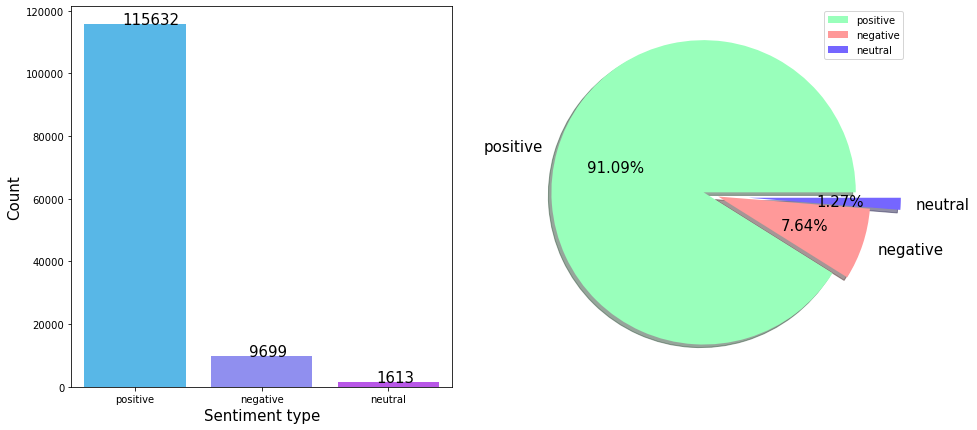

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))          # size of plot
#ax[0].set_title("Review Distribution",size=20)           # giving title to plot      
percentage = df["Sentiment_Type"].value_counts()         
labels = list(df["Sentiment_Type"].value_counts().index) 
colors = ['#99ffbb','#ff9999','#7566ff']
ab=sns.countplot(x = df["Sentiment_Type"], ax = ax[0],palette='cool')
ax[0].set_xlabel("Sentiment type",size=15)
ax[0].set_ylabel("Count",size=15)

for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)

plt.pie(percentage,labels = labels ,explode=[0.1,0,0.2],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 15})
#plt.title('Review ')
plt.legend()
# plt.savefig("distribution.png", format="png")
plt.show()


### Model Building

In [19]:
data = df.copy()                # creating copy of dataframe

In [20]:
data.columns

Index(['asin', 'categories', 'title', 'price', 'brand', 'reviewerID',
       'reviewerName', 'reviewText', 'overall', 'summary', 'reviewTime',
       'helpful_ratio', 'help_cat', 'review', 'compound', 'Sentiment_Type',
       'Sentiment_Type11', 'rev_word_count', 'unique_word_count',
       'product_name'],
      dtype='object')

In [21]:
data=data.drop(['asin', 'categories','title', 'price', 'brand', 'reviewerID',     # Taking dependent and independent column
                'reviewerName', 'reviewText', 'overall', 'summary', 'reviewTime',
       'helpful_ratio', 'help_cat','compound', 'Sentiment_Type','rev_word_count','unique_word_count'],axis=1)
data.head()

,review,Sentiment_Type11,product_name
0,if you are purchasing or have a pack n play th...,2,Pack 'n Play Sheet Tea
1,this sterilizer is so easy to use even a dad l...,2,Express Microwave Sterilizer
2,the express bottle babyfood warmer is a very o...,2,Express Baby Food and Bottle Warmer
3,i am not a clean freak who sterilizes everythi...,2,Express Microwave Sterilizer
4,in my opinion the avent bottle system is super...,2,3 Pack 9oz Bottles


<h1><center> Spliting of data in train and test part</center></h1>

**Here we are considering training data as 66.66 % and testing data as 33.33%**

In [22]:
x_train,x_test,y_train,y_test=train_test_split(data['review'],data['Sentiment_Type11'],test_size=0.33,random_state=42)

In [23]:
a=x_test
b=y_test

**Tf-idf**\
This method is called the TF-IDF stands for “Term Frequency – Inverse Document Frequency ”. TF-IDF is a numerical statistic which measures the importance of the word in a document. Term Frequency: Number of time a word appears in a text document

In [24]:
tf=TfidfVectorizer(sublinear_tf=True, 
                            max_df=0.5, 
                            min_df=1,
                            stop_words=stopwords.words('english'),
                            use_idf=True )
x_train=tf.fit_transform(x_train)            # transforming the train data
x_test=tf.transform(x_test)                  # transforming the test data

### Logistic Regression

In [25]:
lr=LogisticRegression(max_iter=50)          # logistic regression model lib
ovr=OneVsRestClassifier(lr)                 # one vs rest classifier due to multilabel class
ovr.fit(x_train,y_train)
y_pred = ovr.predict(x_test)                # predicting the model

In [26]:
f1= f1_score(y_test,y_pred,average='weighted') # class is inbalance thats why we are using f1 score to get performance
print('F1 score for logistic regression model :',round(f1*100,2),'%')

F1 score for logistic regression model : 91.48 %


### Naive bayes - MultinomialNB

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
Naive = MultinomialNB()
model =Naive.fit(x_train,y_train)
predictions_NB = Naive.predict(x_test)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)
print("Naive Bayes F1 score -> ",f1_score(predictions_NB, y_test,average='weighted')*100)

Naive Bayes Accuracy Score ->  91.1200229160699
Naive Bayes F1 score ->  95.31074039316417


### cross val score

In [28]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,KFold
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=1, random_state=42)
f1_score = cross_val_score(estimator = Naive, X = x_train, y = y_train, cv = cv,scoring='f1_weighted')
print('F1 score :',f1_score.mean()*100)

F1 score : 86.9031246634609


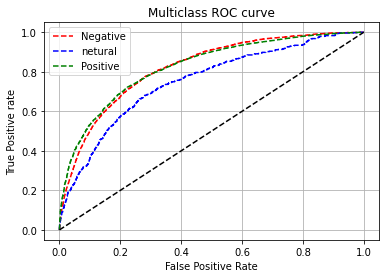

In [29]:
pred_prob = model.predict_proba(x_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Negative')
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='netural')
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Positive')
plt.plot([0, 1], [0, 1], 'k--')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.grid()
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300);

array([[    2,     4,  3184],
       [    0,     7,   524],
       [    1,     7, 38163]], dtype=int64)

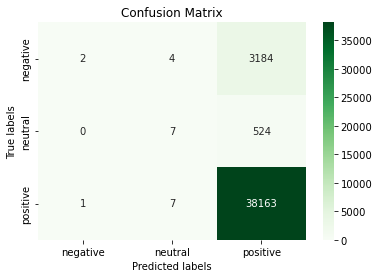

In [30]:
ax= plt.subplot()
cm=confusion_matrix(y_test, predictions_NB)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'neutral','positive']); 
ax.yaxis.set_ticklabels(['negative', 'neutral','positive']);
cm

### Actual and predicted value

In [31]:
dff=pd.DataFrame()                           # creating dataframe for actual and predicted value
dff['review']=a
dff['Actual']=b
dff['pred']=predictions_NB
dff

,review,Actual,pred
101007,i bought it when the baby was months old she w...,1,2
49814,i was given this giraffe at my shower i love i...,2,2
13022,this adorable frog is my daughters favorite ba...,2,2
107142,i ordered these for my baby who always wants t...,2,2
79771,this edge guard is very easy to put on and sti...,2,2
...,...,...,...
67570,i bought this so my son wouldn t slip in our t...,2,2
72732,our son likes it when we rub this toothbrush a...,2,2
72983,i have been looking for about months since my ...,2,2
50947,we ve had of these and each one has had a shor...,2,2


In [32]:
dff=pd.merge(dff, df, left_index=True, right_index=True)

In [33]:
dff=dff.drop(['asin', 'categories',
       'price', 'brand', 'reviewerID','title', 'reviewerName', 'reviewText', 'overall',
       'summary', 'reviewTime', 'helpful_ratio', 'help_cat', 'review_y',
       'compound', 'Sentiment_Type', 'Sentiment_Type11', 'rev_word_count',
       'unique_word_count'],axis=1)
dff

,review_x,Actual,pred,product_name
101007,i bought it when the baby was months old she w...,1,2,[Award Winning] Food Feeder (Large size)
49814,i was given this giraffe at my shower i love i...,2,2,"Sound Machine Soother, Sleep Sheep"
13022,this adorable frog is my daughters favorite ba...,2,2,"Temp Guard, Frog"
107142,i ordered these for my baby who always wants t...,2,2,Clever Little Things That Keep Baby Socks On! ...
79771,this edge guard is very easy to put on and sti...,2,2,"Table Edge Guard with 4 Corners, Grey"
...,...,...,...,...
67570,i bought this so my son wouldn t slip in our t...,2,2,Better Bath Ultimat Bath Mat (Clear) 39 1/2&qu...
72732,our son likes it when we rub this toothbrush a...,2,2,: Baby's 1st Toothbrush
72983,i have been looking for about months since my ...,2,2,"Studio Diaper Bag, Black Dot"
50947,we ve had of these and each one has had a shor...,2,2,Nasal Clear Nasal Aspirator


In [34]:
dss=dff[dff['pred']==2]
ds1=dss['product_name']
dss2=dff[dff['Actual']==2]
ds2=dss2['product_name']

### Actual product positive review- on test data

In [35]:
y=Counter(ds2)
yy={k: v for k, v in sorted(y.items(), key=lambda item: item[1],reverse=True)}
yyy=pd.DataFrame([yy]).T
yyy.iloc[:20,:] # top 20 product who are getteing most positive review in actual data

,0
Sophie the Giraffe Teether,258
"Wishes Hands-Free Breastpump Bra, Pink, XS-L",212
Rainforest Jumperoo,138
"Cradle 'N Swing, My Little Snugabunny",126
"Take-Along Arch, Sunny Stroll",119
6 Pack Soft-Tip Infant Spoon,119
3 Pack Waterproof SuperBib,109
"Philips AVENT Soothie Pacifier, 0-3 Months, 2-Pack, Pink/Purple",106
"Wet Diaper Bag, Black, Small",104
"Breathable Mesh Crib Liner, White",101


### Predicted product positive review

In [36]:
x=Counter(ds1)
xx={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
xxx=pd.DataFrame([xx]).T
xxx.iloc[:15,:] # top 20 product who are getteing most positive review in predicted data

,0
Sophie the Giraffe Teether,271
"Wishes Hands-Free Breastpump Bra, Pink, XS-L",225
Rainforest Jumperoo,142
"Cradle 'N Swing, My Little Snugabunny",134
"Take-Along Arch, Sunny Stroll",124
6 Pack Soft-Tip Infant Spoon,124
"Breathable Mesh Crib Liner, White",116
"Philips AVENT Soothie Pacifier, 0-3 Months, 2-Pack, Pink/Purple",113
3 Pack Waterproof SuperBib,110
"Wet Diaper Bag, Black, Small",109


In [37]:
frame=[yyy.iloc[:10,:],xxx.iloc[:10,:]]
pd.concat(frame,axis=1)

,0,0
Sophie the Giraffe Teether,258,271
"Wishes Hands-Free Breastpump Bra, Pink, XS-L",212,225
Rainforest Jumperoo,138,142
"Cradle 'N Swing, My Little Snugabunny",126,134
"Take-Along Arch, Sunny Stroll",119,124
6 Pack Soft-Tip Infant Spoon,119,124
3 Pack Waterproof SuperBib,109,110
"Philips AVENT Soothie Pacifier, 0-3 Months, 2-Pack, Pink/Purple",106,113
"Wet Diaper Bag, Black, Small",104,109
"Breathable Mesh Crib Liner, White",101,116


#### Vulli Sophie the Giraffe Teether is a product is having highest postive review as compare to other product

### Clustring

<AxesSubplot:xlabel='compound', ylabel='price'>

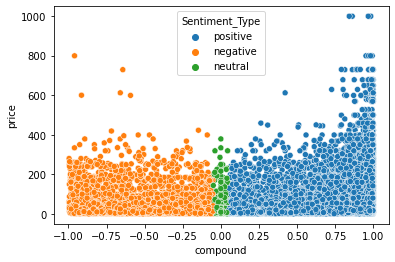

In [38]:
sns.scatterplot(df['compound'],df['price'],hue=df['Sentiment_Type'],data=df)

In [39]:
df_clu=df[['compound','price']]

### Elbow curve

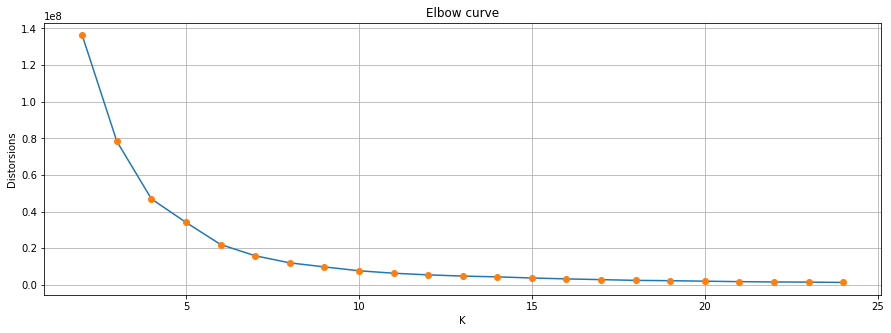

In [40]:
kk=[]
distorsions = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_clu)
    distorsions.append(kmeans.inertia_)
    kk.append(k)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 25), distorsions)
plt.plot(kk,distorsions,'o')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [41]:
# from sklearn.metrics import silhouette_samples, silhouette_score
# import matplotlib.cm as cm
# import numpy as np

# range_n_clusters = [3, 4, 5, 6, 7]

# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(df_clu)

#     silhouette_avg = silhouette_score(df_clu, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

In [42]:
cluster_model = KMeans(n_clusters=4)
pre_cluster=cluster_model.fit_predict(df_clu)
pre_cluster

array([0, 2, 0, ..., 0, 0, 0])

In [43]:
df['cluster_pre']=pre_cluster

In [44]:
X = df.iloc[:, [14, 3]].values          # here we are taking compound and price column
xx=pd.DataFrame(X)
xx

,0,1
0,0.5106,14.0
1,0.9533,50.0
2,0.9943,40.0
3,0.9926,50.0
4,0.8143,21.0
...,...,...
126939,0.7430,1.0
126940,0.9711,29.0
126941,0.7834,29.0
126942,-0.6597,25.0


### Cluster based modeling`

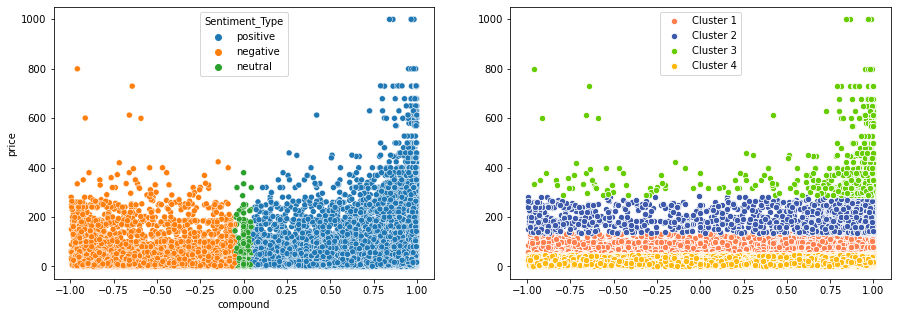

In [45]:
# both graph should be explained when new data is imported
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(df['compound'],df['price'],hue=df['Sentiment_Type'],c=cluster_model.predict(df_clu))
plt.subplot(122)
plt.scatter(X[pre_cluster == 2, 0], X[pre_cluster == 2, 1], s = 40 ,c = '#FF7F50',edgecolors='white',linewidth=0.8, label = 'Cluster 1')
plt.scatter(X[pre_cluster == 1, 0], X[pre_cluster == 1, 1], s = 40 ,c = '#3D59AB',edgecolors='white',linewidth=0.8, label = 'Cluster 2')
plt.scatter(X[pre_cluster == 3, 0], X[pre_cluster == 3, 1], s = 40 ,c = '#66CD00',edgecolors='white',linewidth=0.8, label = 'Cluster 3')
plt.scatter(X[pre_cluster == 0, 0], X[pre_cluster == 0, 1], s = 40 ,c = '#FFB90F',edgecolors='white',linewidth=0.8, label = 'Cluster 4')
plt.legend()
plt.show()

In [46]:
df0=df[df.cluster_pre==0]
df1=df[df.cluster_pre==1]
df2=df[df.cluster_pre==2]


### Churn customer yes , no and not sure

In [47]:
conditions = [(df['Sentiment_Type']=='positive') & (df['overall']>3.5),
              (df['Sentiment_Type']=='negative') & (df['overall']<2.5), 
             ((df['Sentiment_Type']=='neutral') & (df['overall']>2.5) & (df['Sentiment_Type']=='neutral') & (df['overall']<3.5))]

# create a list of the values we want to assign for each condition
values = ['no', 'yes', 'not sure']

# create a new column and use np.select to assign values to it using our lists as arguments
df['churn_yes_no'] = np.select(conditions, values)

# display updated DataFrame
df.head()
 

,asin,categories,title,price,brand,reviewerID,reviewerName,reviewText,overall,summary,...,help_cat,review,compound,Sentiment_Type,Sentiment_Type11,rev_word_count,unique_word_count,product_name,cluster_pre,churn_yes_no
0,B000056JHX,Baby,Graco Pack 'n Play Sheet Tea,14,Graco,AQCHVXD1R9WYI,"D ""sub""",if you are purchasing or have a pack n play th...,5,a necessity,...,most_helpful,if you are purchasing or have a pack n play th...,0.5106,positive,2,71,54,Pack 'n Play Sheet Tea,0,no
1,B000056OUH,Baby,Philips Avent Express Microwave Sterilizer,50,Philips Avent,AQCHVXD1R9WYI,"D ""sub""",this sterilizer is so easy to use even a dad l...,5,best thing since sliced bread,...,most_helpful,this sterilizer is so easy to use even a dad l...,0.9533,positive,2,66,54,Express Microwave Sterilizer,2,no
2,B000056OUF,Baby,Philips Avent Express Baby Food and Bottle Warmer,40,Philips Avent,A1E7QLJVWNFOZY,History_of_Art_Geek,the express bottle babyfood warmer is a very o...,4,the express bottle babyfood warmer does the job,...,most_helpful,the express bottle babyfood warmer is a very o...,0.9943,positive,2,794,362,Express Baby Food and Bottle Warmer,0,no
3,B000056OUH,Baby,Philips Avent Express Microwave Sterilizer,50,Philips Avent,A1E7QLJVWNFOZY,History_of_Art_Geek,i am not a clean freak who sterilizes everythi...,5,just nuke it with the express microwave steam ...,...,most_helpful,i am not a clean freak who sterilizes everythi...,0.9926,positive,2,599,283,Express Microwave Sterilizer,2,no
4,B000056HNX,Baby,Philips Avent 3 Pack 9oz Bottles,21,Philips Avent,A1E7QLJVWNFOZY,History_of_Art_Geek,in my opinion the avent bottle system is super...,5,happy avent customer,...,most_helpful,in my opinion the avent bottle system is super...,0.8143,positive,2,171,106,3 Pack 9oz Bottles,0,no


In [48]:
df['churn_yes_no'].value_counts()  # Count of churn customer

no          96404
0           25144
yes          5050
not sure      346
Name: churn_yes_no, dtype: int64

In [49]:
df['churn_yes_no']=df['churn_yes_no'].replace('0','miss guide review')

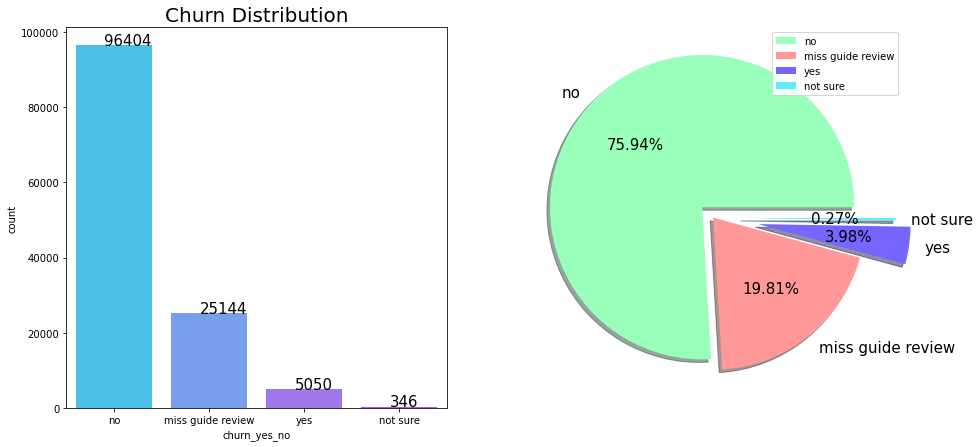

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))          # size of plot
ax[0].set_title("Churn Distribution",size=20)           # giving title to plot      
percentage = df["churn_yes_no"].value_counts()         
labels = list(df["churn_yes_no"].value_counts().index) 
colors = ['#99ffbb','#ff9999','#7566ff','#66e8ff']
ab=sns.countplot(x = df["churn_yes_no"], ax = ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0,0.3,0.2],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 15})
plt.legend()
# plt.savefig("distribution.png", format="png")
plt.show()


In [51]:
df.to_csv('final_data.csv')    # saving of file

## Time series

In [52]:
df=pd.read_csv("final_data.csv",parse_dates=['reviewTime'],index_col="reviewTime")
df

,Unnamed: 0,asin,categories,title,price,brand,reviewerID,reviewerName,reviewText,overall,...,help_cat,review,compound,Sentiment_Type,Sentiment_Type11,rev_word_count,unique_word_count,product_name,cluster_pre,churn_yes_no
reviewTime,,,,,,,,,,,,,,,,,,,,,
2001-07-17,0,B000056JHX,Baby,Graco Pack 'n Play Sheet Tea,14,Graco,AQCHVXD1R9WYI,"D ""sub""",if you are purchasing or have a pack n play th...,5,...,most_helpful,if you are purchasing or have a pack n play th...,0.5106,positive,2,71,54,Pack 'n Play Sheet Tea,0,no
2001-07-23,1,B000056OUH,Baby,Philips Avent Express Microwave Sterilizer,50,Philips Avent,AQCHVXD1R9WYI,"D ""sub""",this sterilizer is so easy to use even a dad l...,5,...,most_helpful,this sterilizer is so easy to use even a dad l...,0.9533,positive,2,66,54,Express Microwave Sterilizer,2,no
2001-07-25,2,B000056OUF,Baby,Philips Avent Express Baby Food and Bottle Warmer,40,Philips Avent,A1E7QLJVWNFOZY,History_of_Art_Geek,the express bottle babyfood warmer is a very o...,4,...,most_helpful,the express bottle babyfood warmer is a very o...,0.9943,positive,2,794,362,Express Baby Food and Bottle Warmer,0,no
2001-07-25,3,B000056OUH,Baby,Philips Avent Express Microwave Sterilizer,50,Philips Avent,A1E7QLJVWNFOZY,History_of_Art_Geek,i am not a clean freak who sterilizes everythi...,5,...,most_helpful,i am not a clean freak who sterilizes everythi...,0.9926,positive,2,599,283,Express Microwave Sterilizer,2,no
2001-08-13,4,B000056HNX,Baby,Philips Avent 3 Pack 9oz Bottles,21,Philips Avent,A1E7QLJVWNFOZY,History_of_Art_Geek,in my opinion the avent bottle system is super...,5,...,most_helpful,in my opinion the avent bottle system is super...,0.8143,positive,2,171,106,3 Pack 9oz Bottles,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-22,126939,B00C33RRKS,Baby,"OXO Tot Cup for Big Kids, Aqua",1,OXO,A2120DYTI72R5V,Melanie H.,great for my toddler s little hands as she s l...,5,...,not_helpful,great for my toddler s little hands as she s l...,0.7430,positive,2,31,25,"Tot Cup for Big Kids, Aqua",0,no
2014-07-22,126940,B00GF9B2Q6,Baby,Infantino Stuff It 2-in-1 Diaper Kit,29,Infantino,A1LINA8MCSONQL,Radar626,out of this in diaper kit i have to say i like...,4,...,not_helpful,out of this in diaper kit i have to say i like...,0.9711,positive,2,187,112,Stuff It 2-in-1 Diaper Kit,0,no
2014-07-22,126941,B00GF9B2Q6,Baby,Infantino Stuff It 2-in-1 Diaper Kit,29,Infantino,ARTHSLN5BW5PW,"R. Mercedes Parker ""Spicy Raw Vegan""",pros attractiveeasy to wipe offconvient and co...,5,...,not_helpful,pros attractiveeasy to wipe offconvient and co...,0.7834,positive,2,54,44,Stuff It 2-in-1 Diaper Kit,0,no


In [53]:
df1=df[df['Sentiment_Type']=='positive'] # featching data only for positive sentiment
df2=df[df['Sentiment_Type']=='negative'] # featching data only for negative sentiment
df3=df[df['Sentiment_Type']=='neutral']  # featching data only for neutral sentiment
print("Positive:{} , Negative:{} , Neutral:{}".format(df1.shape,df2.shape,df3.shape)) # checking shape of all data 

Positive:(115632, 22) , Negative:(9699, 22) , Neutral:(1613, 22)


## Filling Missing values with the help of INTERPOLATE
    It is mostly used in time series data. In backward fill, the missing value is imputed using the next value. Missing values can also be imputed using interpolation. Pandas interpolate method can be used to replace the missing values with different interpolation methods like 'polynomial', 'linear', 'quadratic'.

In [54]:
#function for resampleing the data into months then ploting its actual,trend, seasonality,residual plots with acf & pacf plot

def resample(data,lag):
    global data_s,data_w,d_seasonal,traint,testt,train,test
    
#resample data into months
    data_s=data.resample('m').mean()                                  
    
#imputing missing values with the help of interpolate
    data_s['overall'].interpolate(method="linear",inplace=True)
    data_s['helpful_ratio'].interpolate(method="linear",inplace=True)
    data_s['price'].interpolate(method="linear",inplace=True)
    data_s['compound'].interpolate(method="linear",inplace=True)
    data_s=data_s[['overall','price','helpful_ratio','compound']]
    
#filtering the dependent columns
    data_w=data_s.compound
    
    
#checking trend,seasonal and residual
    ts_comp=seasonal_decompose(data_w,period=12)

    d_trend=ts_comp.trend
    d_seasonal=ts_comp.seasonal
    d_residual=ts_comp.resid
#plot the actual,trend, seasonality,residual components
    fig,ax = plt.subplots(4,1,figsize=(20,12))
    plt.subplot(411)
    plt.plot(data_w,label='actual')
    plt.legend()
    plt.subplot(412)
    plt.plot(d_trend,label='Trend',c='red')
    plt.legend()
    plt.subplot(413)
    plt.plot(d_seasonal,label='Seasonal',c='g')
    plt.legend()
    plt.subplot(414)
    plt.plot(d_residual,label='Residual')
    plt.legend()
    
#Checking data is stationarity or not
    pvalue=adfuller(data_w)[1]
    print('Pvalue for data',pvalue)
    if pvalue < 0.05:
        print('Data is stationary. Proceed to model building\n')
    else:
        print('Data is not stationary. Diff. the data before model building\n')

#Checking seasonal data is stationarity or not
    pvalue1=adfuller(d_seasonal)[1]
    print('Pvalue for data',pvalue1)
    if pvalue1 < 0.05:
        print('Seasonal Data is stationary. Proceed to model building\n')
    else:
        print('Seasonal Data is not stationary. Diff. the data before model building\n')
        
#ploting ACF & PACF plot
    _,ax=plt.subplots(1,2,figsize=(14,8))

    plot_pacf(data_w,lags=lag,ax=ax[0],c='black');
    plot_acf(data_w,lags=lag,ax=ax[1],c='black');
    
#spliting our data into test train with 70% train and 30% test
    ss=int(len(data_w)*0.7)
    traint=data_s[:ss]
    testt=data_s[ss:]
    print('70% train data={},30% test data={}'.format(len(traint),len(testt)))
    train=traint.compound
    test=testt.compound
    print('70% train data={},30% test data={}'.format(len(train),len(test)))

    return data_s,data_w

### Sarimax model

In [92]:
#function for checking best (p,d,q & P,D,Q) values for sarimax model
def bestvalue(p,d,q,P,D,Q):
    global RMSE
    li=[]                      #Creating loop for various p,d,q values
    for i in range(p):
        for j in range(q):
            li.append((i,d,j))
    bi=[]
    for I in range(P):          #Creating loop for various P,D,Q values
        for J in range(Q):
            bi.append((I,D,J))
    ci=[]
    for i in (li):
        for j in(bi):
            ci.append((i,j))
    
    model1 = []
    for i in li:
        for j in bi:
            m1=SARIMAX(train,order=(i),seasonal_order=(j[0],j[1],j[2],10),initialization='approximate_diffuse').fit() #Building model for different values of p,d,q & P,D,Q
            model1.append(m1)
    RMSE=[]
    for i in model1:
        a=mean_squared_error(train,i.fittedvalues,squared=False)        #Cheking RMSE value for the model
        RMSE.append(a)                                                  #Appending RMSE value
    minrmse=RMSE.index(min(RMSE))
    print("Min RMSE at index:",minrmse)
    for i,j in enumerate(RMSE):
        print("RMSE values for the models at index: ",i,j)
    print('\nModel(p,d,q), (P, D, Q) at indexs:')
    for a,b in enumerate(ci):
        print(a,b)    
    #return minrmse

In [56]:
#Q1:what are exog feature means and what their another name?
#Ans: Exogenous features is also known as economatric similar to dependend variable but they are not same.
#If the variable is dependent on variable with in the model it is an endogenous.

def sarimax1(p,d,q,P,D,Q,lag):
    global aic1,bic1,mse1,m1,pred,exog_train,exog_test

#Creating exogenus features for sarimax model
    exog_train=traint[['overall','helpful_ratio']]
    exog_test=testt[['overall','helpful_ratio']]

#building SARIMAX model with p,d,q &P,D,Q values
    m1=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,lag),exog=exog_train.values).fit() 
    summ=m1.summary()                #printing model summary
    aic1,bic1=m1.aic,m1.bic           #featching aic and bic values from model

#predition test data for model building    
    pred=m1.forecast(len(testt.compound),exog=exog_test.values) 
    
#creating dataframe for actual and predicted values 
    actual=[]
    pred1=[]
    for i in range(len(pred)):
        actual.append(test[i])
        pred1.append(pred[i])
    df1=pd.DataFrame({'Actual_data':actual,'Forecast_data':pred1})
#printing RMSE values for the model
    mse1=mean_squared_error(df1.Actual_data,df1.Forecast_data)
    
#checking our model with ljungbox test weather its good or not.
    pvalue=sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True).lb_pvalue.values
    if pvalue < 0.05:
        print('Model status : Not a good model')
    else:
        print('Model status : Good model')
    print("\nLength of predict data:",len(pred))
    print("RMSE value for the model:",mse1)
    print("\n\n-----------------------------------------Model Summary:---------------------------------------------\n")
    
#ploting actual test data and predicted forecast data
    df1.Actual_data.plot(figsize=(10,8),legend=True)
    df1.Forecast_data.plot(legend=True)
    plt.title('Actual test data and its Forecast ')
    return summ,df1,pvalue

In [57]:
#function for ploting actual,predicted forecast and future forecast
def Futureplot(value):

# impute the last predicted value to top future forecast data for removing gap btwn them
    fcast=pd.concat([pd.Series(pred[[value]]),fcast3]) 
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(data_s.compound, label='Actual')  #plot actual data
    ax.plot(pred, label='Predicted')          #plot predicted forecast data
    ax.plot(fcast, label='Future')            #plot future forecast data
    plt.xlabel('Months',fontsize=16)
    leg = ax.legend(fontsize=15)
    plt.title('Actual  / Predicted / Future',fontsize=16)
    plt.ylabel('Sentiment score',fontsize=16)
    

### Forecast for full data

Pvalue for data 0.00022179289865305958
Data is stationary. Proceed to model building

Pvalue for data 0.0
Seasonal Data is stationary. Proceed to model building

70% train data=109,30% test data=48
70% train data=109,30% test data=48


(             overall      price  helpful_ratio  compound
 reviewTime                                              
 2001-07-31  4.750000  38.500000       1.000000  0.862700
 2001-08-31  5.000000  51.666667       0.942600  0.923867
 2001-09-30  5.000000  36.333333       0.971300  0.915783
 2001-10-31  5.000000  21.000000       1.000000  0.907700
 2001-11-30  4.333333  20.666667       0.920513  0.957867
 ...              ...        ...            ...       ...
 2014-03-31  4.276855  32.582090       0.151975  0.732278
 2014-04-30  4.245811  35.599868       0.134382  0.726315
 2014-05-31  4.221698  37.918868       0.111708  0.717310
 2014-06-30  4.226657  39.380613       0.094077  0.720108
 2014-07-31  4.238838  44.532123       0.041377  0.685109
 
 [157 rows x 4 columns],
 reviewTime
 2001-07-31    0.862700
 2001-08-31    0.923867
 2001-09-30    0.915783
 2001-10-31    0.907700
 2001-11-30    0.957867
                 ...   
 2014-03-31    0.732278
 2014-04-30    0.726315
 2014-05-31    

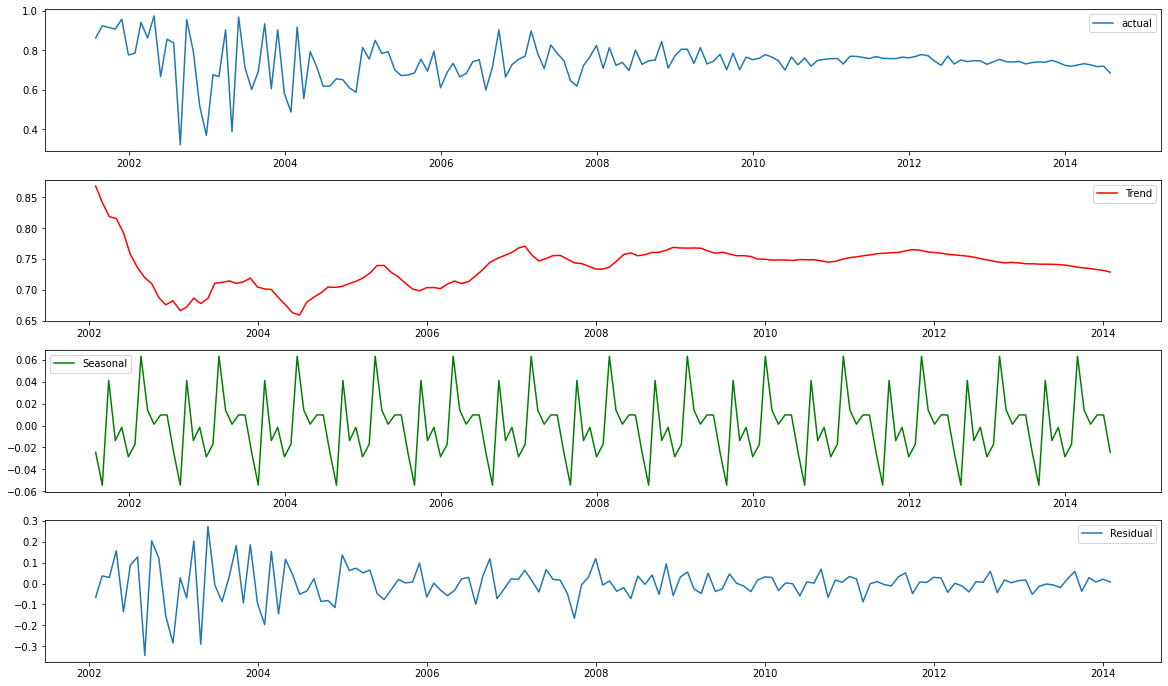

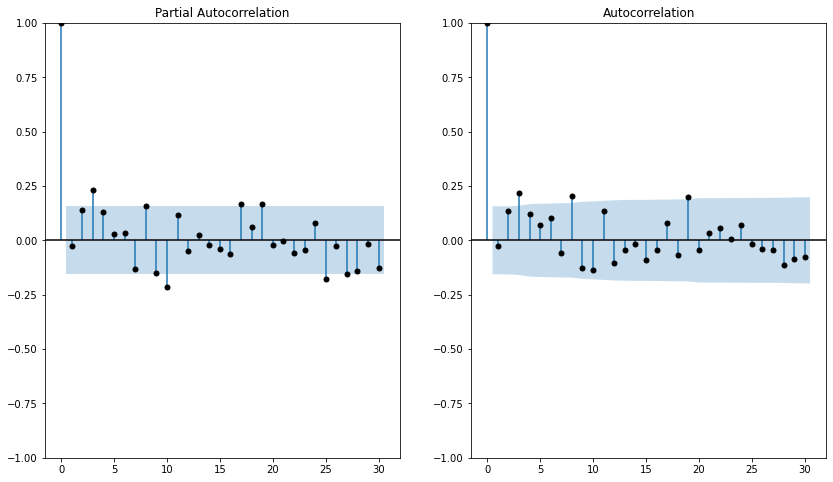

In [58]:
resample(df,30)

In [59]:
bestvalue(4,0,3,3,0,4)

Min RMSE at index: 129
RMSE values for the models at index:  0 0.7504735500621881
RMSE values for the models at index:  1 0.5101082127219079
RMSE values for the models at index:  2 0.41079178945266603
RMSE values for the models at index:  3 0.38344160618533263
RMSE values for the models at index:  4 0.3184369251843015
RMSE values for the models at index:  5 0.3045393097060794
RMSE values for the models at index:  6 0.30491276094552655
RMSE values for the models at index:  7 0.30504431847331115
RMSE values for the models at index:  8 0.30853313987848646
RMSE values for the models at index:  9 0.3047032703165601
RMSE values for the models at index:  10 0.3045589279090472
RMSE values for the models at index:  11 0.30481556962983325
RMSE values for the models at index:  12 0.46811501148190077
RMSE values for the models at index:  13 0.3590857384409024
RMSE values for the models at index:  14 0.3269598699068329
RMSE values for the models at index:  15 0.3110954043997882
RMSE values for the 

Model status : Good model

Length of predict data: 48
RMSE value for the model: 0.000784565400589677


-----------------------------------------Model Summary:---------------------------------------------



(<class 'statsmodels.iolib.summary.Summary'>
 """
                                      SARIMAX Results                                      
 Dep. Variable:                           compound   No. Observations:                  109
 Model:             SARIMAX(3, 0, 1)x(2, 0, 1, 30)   Log Likelihood                 119.436
 Date:                            Wed, 07 Dec 2022   AIC                           -218.872
 Time:                                    09:12:23   BIC                           -191.959
 Sample:                                07-31-2001   HQIC                          -207.958
                                      - 07-31-2010                                         
 Covariance Type:                              opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1             0.1798      0.010     18.771      0.00

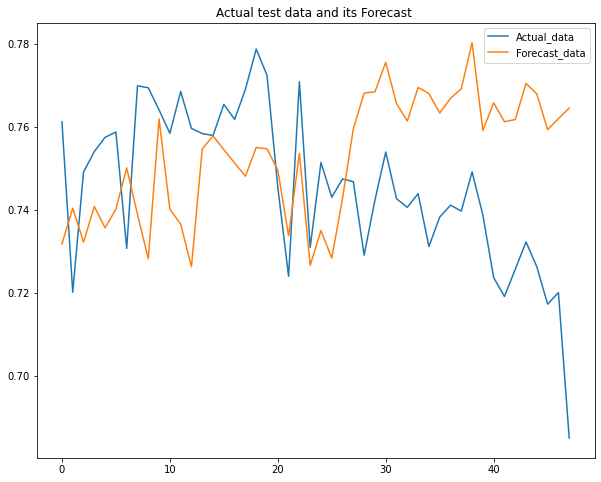

In [60]:
sarimax1(3,0,1,2,0,1,30)# Building model for p,d,q & P,D,Q with lag value.

2014-08-31    0.727727
2014-09-30    0.746887
2014-10-31    0.734880
2014-11-30    0.745579
2014-12-31    0.753616
2015-01-31    0.668989
2015-02-28    0.747199
2015-03-31    0.714130
2015-04-30    0.768011
2015-05-31    0.743060
2015-06-30    0.706528
2015-07-31    0.697471
2015-08-31    0.718099
Freq: M, Name: predicted_mean, dtype: float64


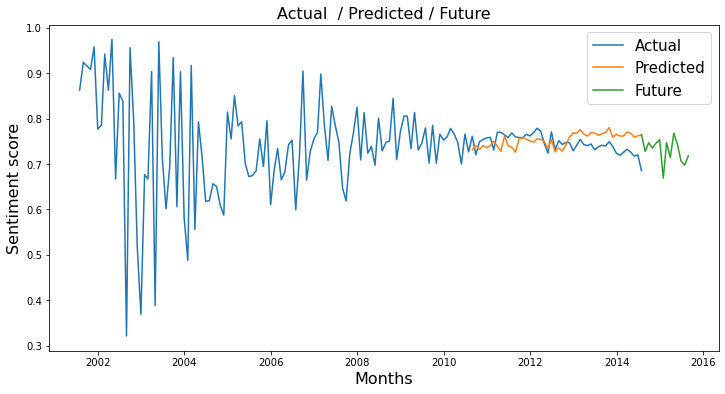

In [61]:
#Done future forecast of data we had given for resample
fcast3 = m1.predict(start=len(data_w), end=len(data_w)+12,exog=exog_train[:61])
print(fcast3)

#Plot actual,predicted forecast and future forecast data
Futureplot(47) #using ploting function for ploting graphs with last pred value to reduce the gap btw pred and future forecast.

# Conclusion: As we can see from the above Future forecast for baby data we can say that reviews positivity got decreases.

### Forecast for negative data

Pvalue for data 2.083586292433e-15
Data is stationary. Proceed to model building

Pvalue for data 0.0
Seasonal Data is stationary. Proceed to model building

70% train data=100,30% test data=44
70% train data=100,30% test data=44


(             overall      price  helpful_ratio  compound
 reviewTime                                              
 2002-08-31  3.000000  13.000000       1.000000 -0.347900
 2002-09-30  2.750000  23.750000       0.888889 -0.464100
 2002-10-31  2.500000  34.500000       0.777778 -0.580300
 2002-11-30  2.250000  45.250000       0.666667 -0.696500
 2002-12-31  2.000000  56.000000       0.555556 -0.812700
 ...              ...        ...            ...       ...
 2014-03-31  2.711765  26.317647       0.161859 -0.515124
 2014-04-30  2.690476  31.417989       0.129873 -0.514567
 2014-05-31  2.650430  33.851003       0.142856 -0.533604
 2014-06-30  2.630058  32.872832       0.089595 -0.492563
 2014-07-31  2.511013  38.696035       0.013216 -0.501828
 
 [144 rows x 4 columns],
 reviewTime
 2002-08-31   -0.347900
 2002-09-30   -0.464100
 2002-10-31   -0.580300
 2002-11-30   -0.696500
 2002-12-31   -0.812700
                 ...   
 2014-03-31   -0.515124
 2014-04-30   -0.514567
 2014-05-31   -

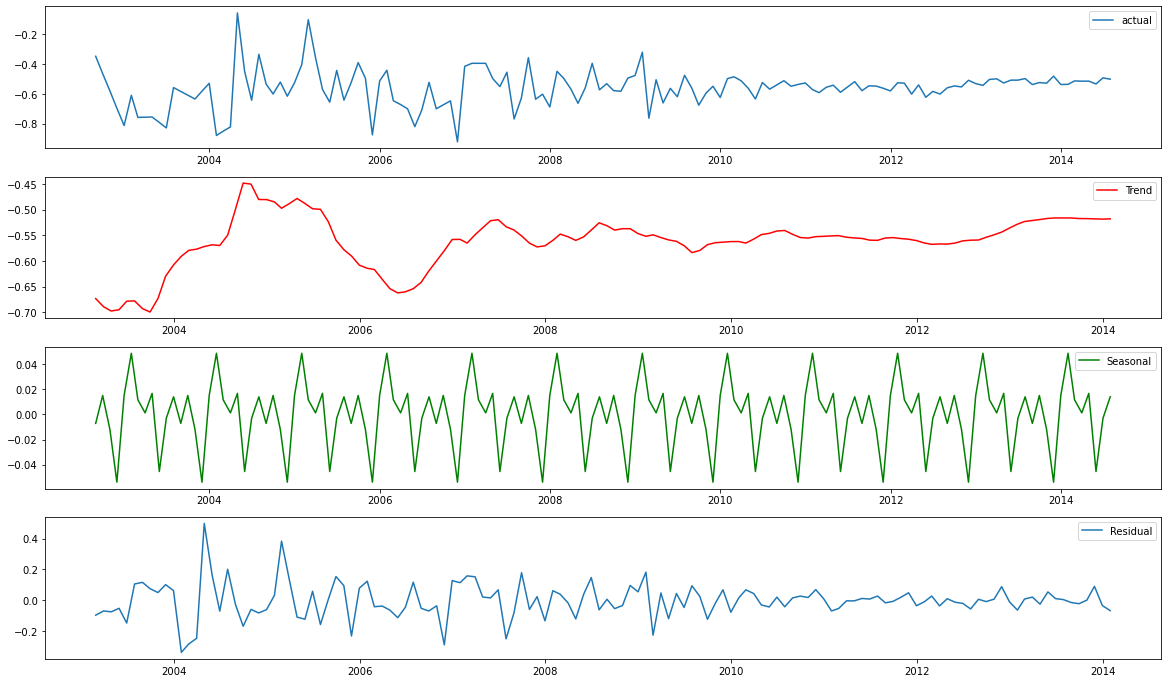

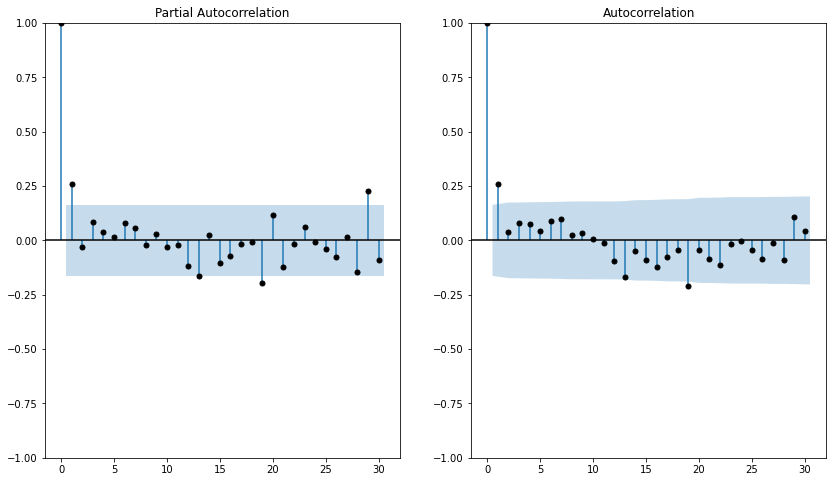

In [62]:
resample(df2,30)

In [63]:
bestvalue(3,0,2,4,0,3)

Min RMSE at index: 69
RMSE values for the models at index:  0 0.5902603507361023
RMSE values for the models at index:  1 0.41730148591702204
RMSE values for the models at index:  2 0.3573870959637931
RMSE values for the models at index:  3 0.28935562615978944
RMSE values for the models at index:  4 0.26570920230481854
RMSE values for the models at index:  5 0.26571283464174605
RMSE values for the models at index:  6 0.27566767168132705
RMSE values for the models at index:  7 0.26567001472136625
RMSE values for the models at index:  8 0.26575866945468857
RMSE values for the models at index:  9 0.26981181941968013
RMSE values for the models at index:  10 0.26523019962292893
RMSE values for the models at index:  11 0.2658336273712845
RMSE values for the models at index:  12 0.37283368907995607
RMSE values for the models at index:  13 0.30902111736784427
RMSE values for the models at index:  14 0.26850243820503245
RMSE values for the models at index:  15 0.2502702829536858
RMSE values for 

Model status : Good model

Length of predict data: 44
RMSE value for the model: 0.0009200643572344134


-----------------------------------------Model Summary:---------------------------------------------



(<class 'statsmodels.iolib.summary.Summary'>
 """
                                       SARIMAX Results                                      
 Dep. Variable:                            compound   No. Observations:                  100
 Model:             SARIMAX(2, 0, 1)x(1, 0, [], 30)   Log Likelihood                  49.426
 Date:                             Wed, 07 Dec 2022   AIC                            -84.852
 Time:                                     09:13:14   BIC                            -66.615
 Sample:                                 08-31-2002   HQIC                           -77.471
                                       - 11-30-2010                                         
 Covariance Type:                               opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1             0.0049      0.017      0.287  

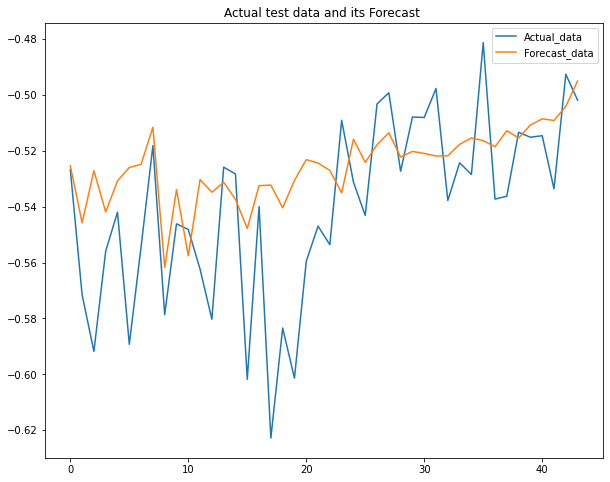

In [64]:
sarimax1(2,0,1,1,0,0,30)# Building model for p,d,q & P,D,Q with lag value.

2014-08-31   -0.548311
2014-09-30   -0.548577
2014-10-31   -0.567142
2014-11-30   -0.494992
2014-12-31   -0.546352
2015-01-31   -0.572254
2015-02-28   -0.599253
2015-03-31   -0.609093
2015-04-30   -0.491586
2015-05-31   -0.574078
2015-06-30   -0.554885
2015-07-31   -0.536980
2015-08-31   -0.556373
Freq: M, Name: predicted_mean, dtype: float64


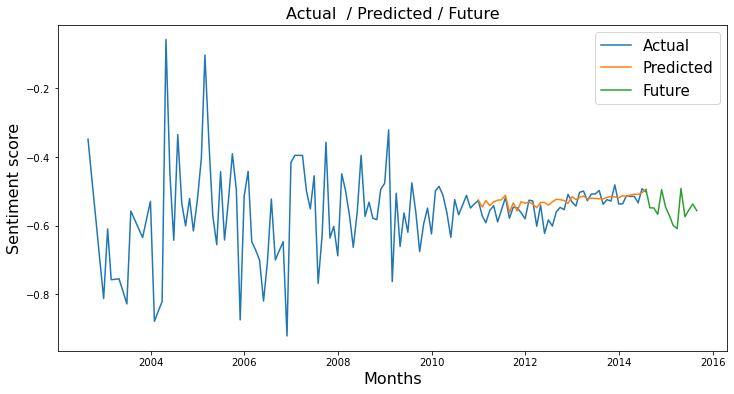

In [65]:
#Done future forecast of data we had given for resample
fcast3 = m1.predict(start=len(data_w), end=len(data_w)+12,exog=exog_train[:57])
print(fcast3)

#Plot actual,predicted forecast and future forecast data
Futureplot(43) #using ploting function for ploting graphs with last pred value to reduce the gap btw pred and future forecast.

### Featching top most 3neg product

In [66]:
a=Counter(df2['product_name']) # count of each product
xx={k: v for k, v in sorted(a.items(), key=lambda item: item[1],reverse=True)}
x1=pd.DataFrame([xx]).T
x1

,0
Sophie the Giraffe Teether,47
DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision,47
"Diaper Genie Elite Diaper Disposal Pail, White",43
"Wishes Hands-Free Breastpump Bra, Pink, XS-L",38
NTM-910YIC - Baby Call Nursery Monitor,34
...,...
"Philips AVENT BPA Free Soothie Pacifier, Green, 3+ Months, 6 pack",1
"Kick and Play Piano Gym, Pink",1
Roomy Back Seat Storage,1
Lunch Bowl 13oz/400ml Food Glass Containers - Multi Color Garden (Set of 4),1


In [67]:
df2['asin'].value_counts()

B000IDSLOG    47
B0052QYLUM    47
B001BMWABI    43
B00295MQLU    38
B000S35QLC    34
              ..
B004K6LMXY     1
B001I463G2     1
B007J5DXAS     1
B001R5VNYY     1
B00FMHFIDA     1
Name: asin, Length: 3022, dtype: int64

In [68]:
df21=df2[(df2['asin']=='B000IDSLOG')|(df2['asin']=='B0052QYLUM')|(df2['asin']=='B001BMWABI')]
df21['asin'].unique()

array(['B001BMWABI', 'B000IDSLOG', 'B0052QYLUM'], dtype=object)

In [69]:
df21.shape

(137, 22)

Pvalue for data 5.963473272492332e-06
Data is stationary. Proceed to model building

Pvalue for data 0.0
Seasonal Data is stationary. Proceed to model building

70% train data=46,30% test data=21
70% train data=46,30% test data=21


(             overall  price  helpful_ratio  compound
 reviewTime                                          
 2009-01-31  5.000000   38.0       0.666667  -0.34000
 2009-02-28  4.636364   38.0       0.670034  -0.35080
 2009-03-31  4.272727   38.0       0.673401  -0.36160
 2009-04-30  3.909091   38.0       0.676768  -0.37240
 2009-05-31  3.545455   38.0       0.680135  -0.38320
 ...              ...    ...            ...       ...
 2014-03-31  2.000000   53.5       0.250000  -0.45295
 2014-04-30  3.000000   52.0       0.000000  -0.65940
 2014-05-31  1.000000  100.0       0.000000  -0.88030
 2014-06-30  3.000000   18.0       0.000000  -0.75710
 2014-07-31  1.500000   79.5       0.250000  -0.55360
 
 [67 rows x 4 columns],
 reviewTime
 2009-01-31   -0.34000
 2009-02-28   -0.35080
 2009-03-31   -0.36160
 2009-04-30   -0.37240
 2009-05-31   -0.38320
                ...   
 2014-03-31   -0.45295
 2014-04-30   -0.65940
 2014-05-31   -0.88030
 2014-06-30   -0.75710
 2014-07-31   -0.55360
 Freq: 

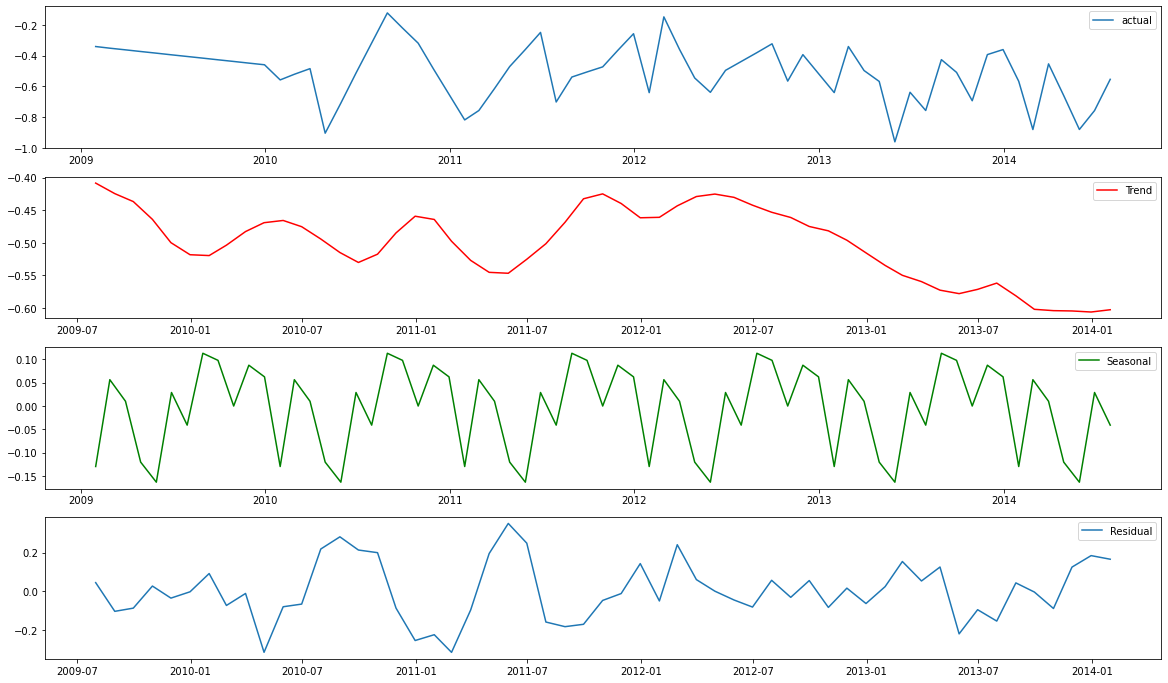

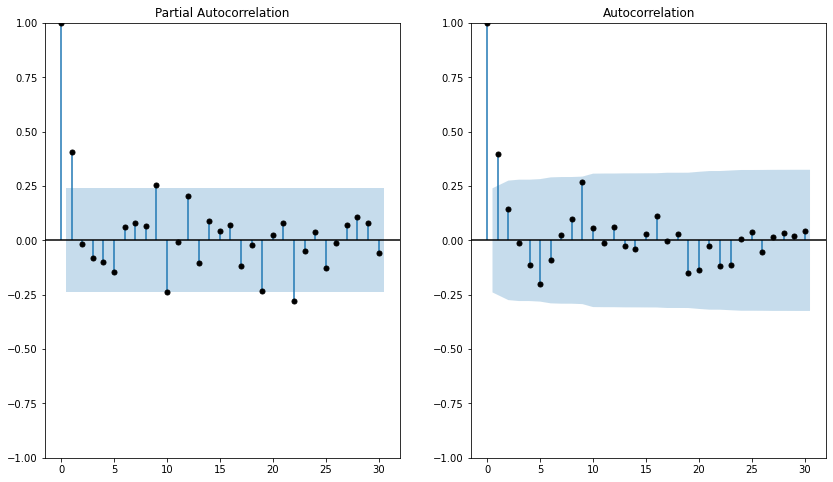

In [70]:
resample(df21,30) #resampling data with their plots 

In [71]:
bestvalue(4,0,2,5,0,3)#searching best value for p,d,q and P,D,Q with low rmse value

Min RMSE at index: 86
RMSE values for the models at index:  0 0.48927670813722973
RMSE values for the models at index:  1 0.3494216977376817
RMSE values for the models at index:  2 0.3142294605865476
RMSE values for the models at index:  3 0.2724265908934358
RMSE values for the models at index:  4 0.2611358011279661
RMSE values for the models at index:  5 0.2594169364466998
RMSE values for the models at index:  6 0.2687034543648983
RMSE values for the models at index:  7 0.2603556829275591
RMSE values for the models at index:  8 0.2559393845795462
RMSE values for the models at index:  9 0.25336493881195576
RMSE values for the models at index:  10 0.2534727631736497
RMSE values for the models at index:  11 0.2534346799525366
RMSE values for the models at index:  12 0.25344964494335714
RMSE values for the models at index:  13 0.2534486333093139
RMSE values for the models at index:  14 0.253451819213693
RMSE values for the models at index:  15 0.32213997452961785
RMSE values for the model

Model status : Good model

Length of predict data: 21
RMSE value for the model: 0.14963824652358443


-----------------------------------------Model Summary:---------------------------------------------



(<class 'statsmodels.iolib.summary.Summary'>
 """
                                       SARIMAX Results                                      
 Dep. Variable:                            compound   No. Observations:                   46
 Model:             SARIMAX(2, 0, 1)x(3, 0, [], 30)   Log Likelihood                  12.160
 Date:                             Wed, 07 Dec 2022   AIC                             -6.319
 Time:                                     09:15:27   BIC                             10.139
 Sample:                                 01-31-2009   HQIC                            -0.154
                                       - 10-31-2012                                         
 Covariance Type:                               opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1            -0.1524      0.013    -11.316  

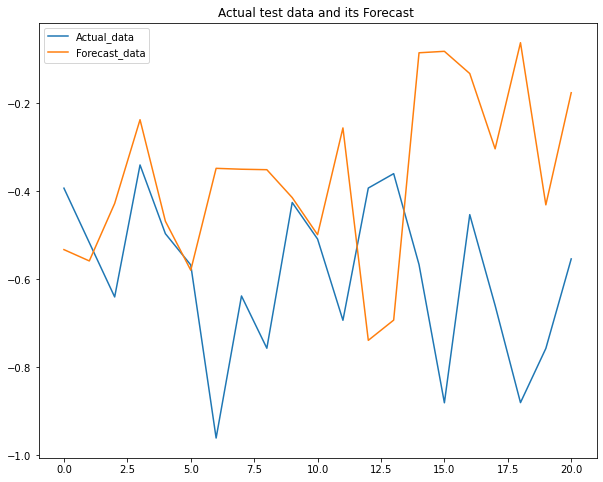

In [72]:
sarimax1(2,0,1,3,0,0,30)#building model with (p,d,q,P,D,Q,lag) values

2014-08-31   -0.875453
2014-09-30   -0.732833
2014-10-31   -0.544130
2014-11-30   -0.457233
2014-12-31   -0.545991
2015-01-31   -0.605835
2015-02-28   -0.657399
2015-03-31   -0.811586
2015-04-30   -0.753350
2015-05-31   -0.272603
2015-06-30   -0.168301
2015-07-31   -0.168842
2015-08-31   -0.164864
Freq: M, Name: predicted_mean, dtype: float64


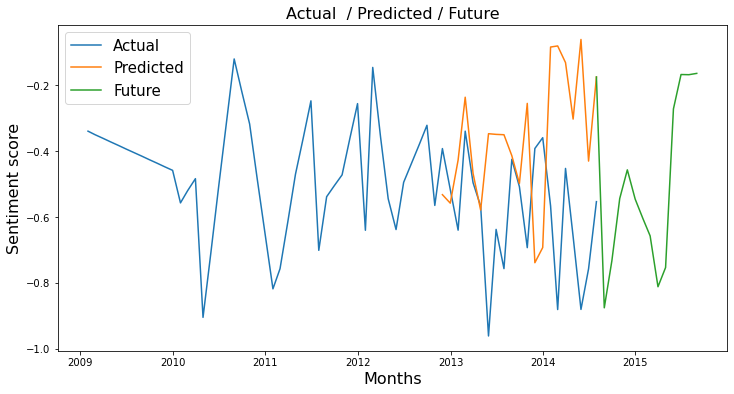

In [73]:
# Done future forecast of data we had given for resample
fcast3 = m1.predict(start=len(data_w), end=len(data_w)+12,exog=exog_train[:34])
print(fcast3)


#Plot actual,predicted forecast and future forecast data
Futureplot(20) #using ploting function for ploting graphs with last pred value to reduce the gap btw pred and future forecast.

### Conclusion: Reviews for top 3 neg products got increases over a period of time then slightly decreases.

## Forcast for positive reviews

Pvalue for data 0.43386747765516187
Data is not stationary. Diff. the data before model building

Pvalue for data 0.0
Seasonal Data is stationary. Proceed to model building

70% train data=109,30% test data=48
70% train data=109,30% test data=48


(             overall      price  helpful_ratio  compound
 reviewTime                                              
 2001-07-31  4.750000  38.500000       1.000000  0.862700
 2001-08-31  5.000000  51.666667       0.942600  0.923867
 2001-09-30  5.000000  36.333333       0.971300  0.915783
 2001-10-31  5.000000  21.000000       1.000000  0.907700
 2001-11-30  4.333333  20.666667       0.920513  0.957867
 ...              ...        ...            ...       ...
 2014-03-31  4.412888  33.339241       0.151994  0.841983
 2014-04-30  4.402927  36.120000       0.134403  0.850950
 2014-05-31  4.386691  38.486508       0.107970  0.845636
 2014-06-30  4.382291  40.296111       0.095105  0.841123
 2014-07-31  4.426639  45.920492       0.044670  0.820240
 
 [157 rows x 4 columns],
 reviewTime
 2001-07-31    0.862700
 2001-08-31    0.923867
 2001-09-30    0.915783
 2001-10-31    0.907700
 2001-11-30    0.957867
                 ...   
 2014-03-31    0.841983
 2014-04-30    0.850950
 2014-05-31    

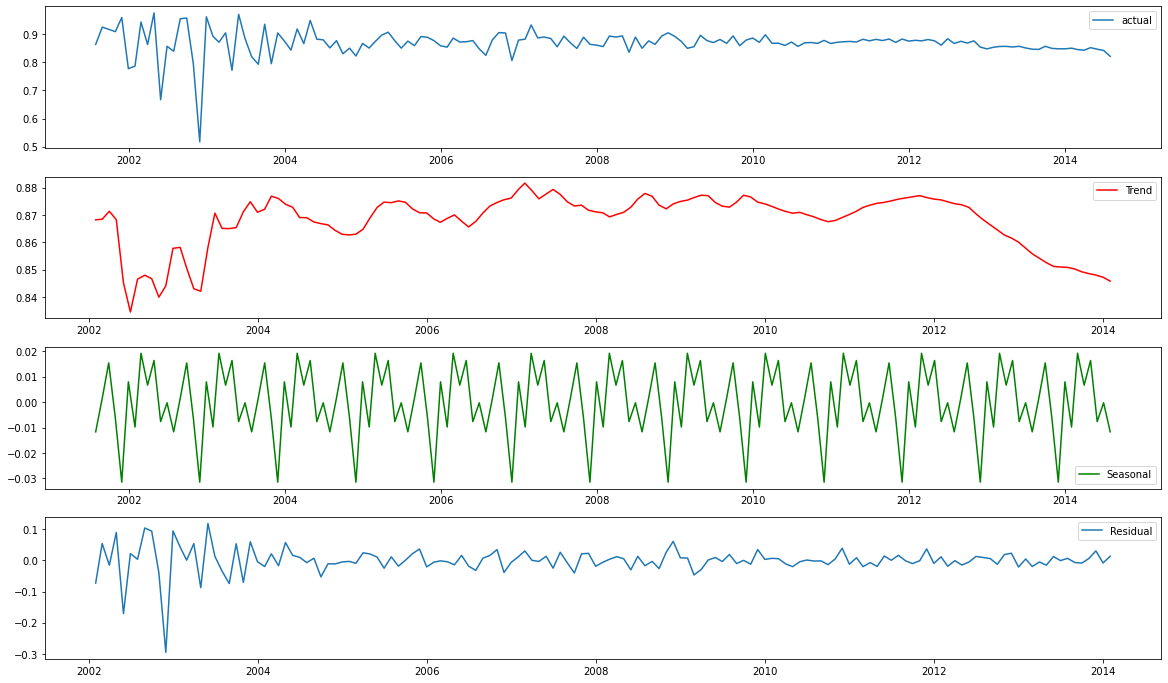

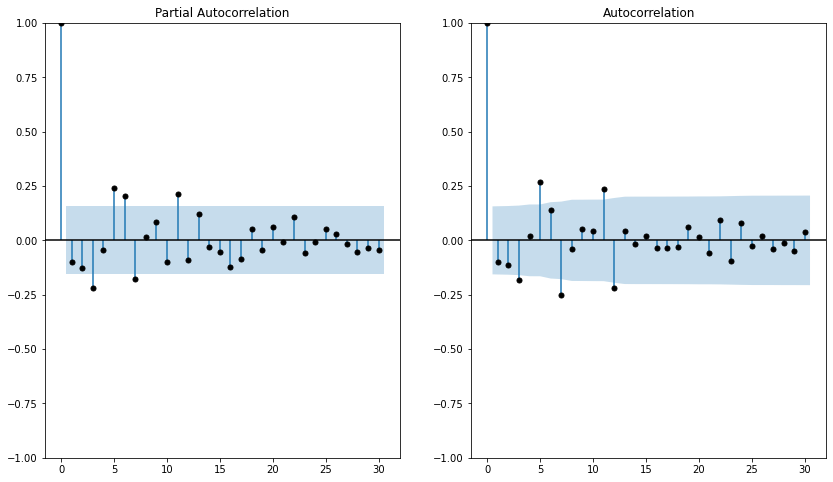

In [79]:
resample(df1,30)

In [94]:
bestvalue(5,0,4,4,0,3)

Min RMSE at index: 84
RMSE values for the models at index:  0 0.8714284182381502
RMSE values for the models at index:  1 0.5768494267707064
RMSE values for the models at index:  2 0.5255191690488535
RMSE values for the models at index:  3 0.2801580503501658
RMSE values for the models at index:  4 0.27811621605906856
RMSE values for the models at index:  5 0.2801276856621211
RMSE values for the models at index:  6 0.30569492172668816
RMSE values for the models at index:  7 0.3131031449598436
RMSE values for the models at index:  8 0.31154492089390123
RMSE values for the models at index:  9 0.2980628058288696
RMSE values for the models at index:  10 0.35739024904261285
RMSE values for the models at index:  11 0.295255294057561
RMSE values for the models at index:  12 0.49012062067729534
RMSE values for the models at index:  13 0.4131327779395447
RMSE values for the models at index:  14 0.4500191544425865
RMSE values for the models at index:  15 0.2794413321478248
RMSE values for the mode

Model status : Good model

Length of predict data: 48
RMSE value for the model: 0.00012269318824401345


-----------------------------------------Model Summary:---------------------------------------------



(<class 'statsmodels.iolib.summary.Summary'>
 """
                                      SARIMAX Results                                      
 Dep. Variable:                           compound   No. Observations:                  109
 Model:             SARIMAX(4, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 178.418
 Date:                            Wed, 07 Dec 2022   AIC                           -338.836
 Time:                                    14:30:13   BIC                           -314.697
 Sample:                                07-31-2001   HQIC                          -329.049
                                      - 07-31-2010                                         
 Covariance Type:                              opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1             0.0663      0.007      8.887      0.00

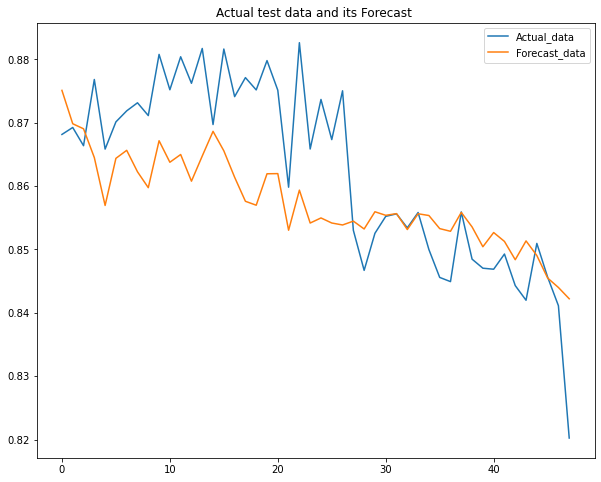

In [86]:
sarimax1(4,1,1,0,0,1,12)

2014-08-31    0.897488
2014-09-30    0.900127
2014-10-31    0.894401
2014-11-30    0.899075
2014-12-31    0.880600
2015-01-31    0.884080
2015-02-28    0.893751
2015-03-31    0.891105
2015-04-30    0.921655
2015-05-31    0.910147
2015-06-30    0.880828
2015-07-31    0.875557
2015-08-31    0.885116
Freq: M, Name: predicted_mean, dtype: float64


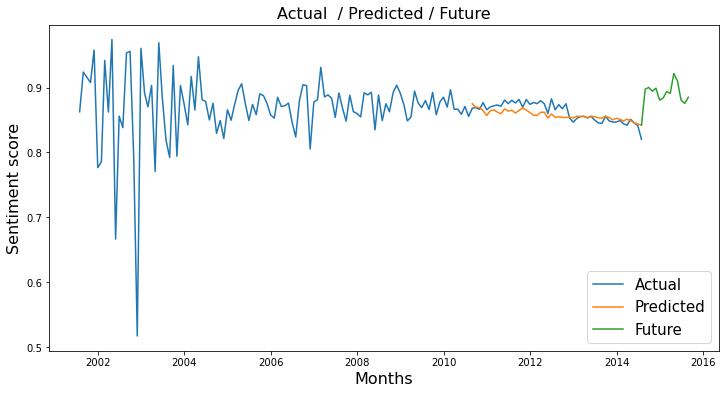

In [87]:
# Done future forecast of data we had given for resample
fcast3 = m1.predict(start=len(data_w), end=len(data_w)+12,exog=exog_train[:61])
print(fcast3)


#Plot actual,predicted forecast and future forecast data
Futureplot(47) #using ploting function for ploting graphs with last pred value to reduce the gap btw pred and future forecast.

### Conclusion:Here we can observe that in future may Positive reviews show positive upword trend on reviews data.

# Wordcloud

In [88]:
def wordcloud(df):
    stopwords = set(STOPWORDS)
    for val in df['review']: 
    # typecaste each val to string
        val = str(val)
 
    # split the value
        tokens = val.split()
     
    # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
     
    #comment_words += " ".join(tokens)+" "

    words = " ".join(sent for sent in df['review'])
    wordcloud = WordCloud(width=800, height=500, random_state=42,stopwords = stopwords, max_font_size=100).generate(words)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.title(name,fontsize=25)
    plt.show()

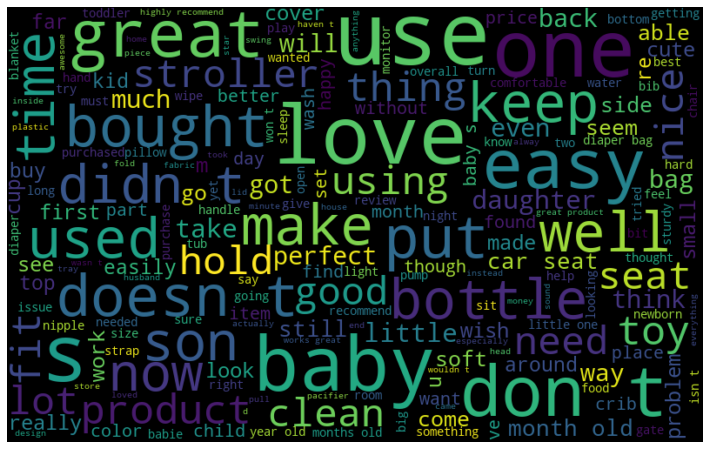

In [89]:
wordcloud(df1)     #wordcloud for positive reviews

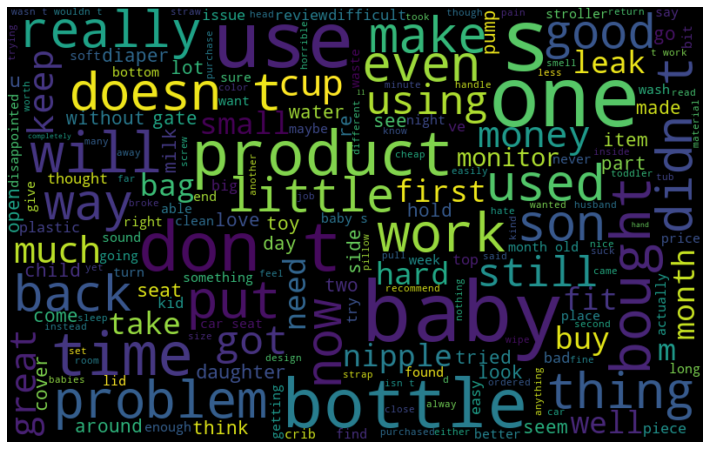

In [90]:
wordcloud(df2)   # wordcloud for negative reviews

# Solution for buisness improvement

There are some loyal customer  who wants to chunk out. 
       Sarah , Amy ,Gissica , Jen

This customer should be given some special attention because this customer are regular to our website.

The product which are worst and having most negative review should be taken some action on them for improvement or stop promoting them on their selling portal.

     6 pack soft tip infant spoon, Little snugabunny,Rainforest Jumperoo,Giraffee Teether

The company should increase the product inventory the product which are highly recommended by the customer on their previous experience some of the products are
	Manual Breast pump, Nasal Aspirator, Newborn gift set, Strap Cover, Crozy cart 

It seems that from period of October to January their highest sales so seller should store bulk stock in their inventory
    